##### Imports

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install wandb -qU

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 44.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 205.1/205.1 kB 27.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.3 MB/s eta 0:00:00


In [3]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 45.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 77.4 MB/s eta 0:00:00


In [4]:
!pip install torchmetrics 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 30.7 MB/s eta 0:00:00


In [5]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision.datasets import CIFAR10
import torchvision.transforms as T
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from IPython.display import clear_output
from tqdm.notebook import tqdm
from torchmetrics.classification import MulticlassF1Score, F1Score
from torch.optim import Adam, SGD
from torch import nn
import numpy as np
import torchvision
from torchvision import transforms
from torchvision.datasets import ImageFolder
from PIL import Image
import random


from torch.utils.data import random_split

In [6]:
import torch
torch.manual_seed(42)

In [7]:
import seaborn as sns
import pandas as pd
sns.set_theme(style="darkgrid")

In [8]:
import wandb
wandb.login()

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

#### Level up the data

In [ ]:
# data_dir = "/content/drive/MyDrive/datasets"
# # 
# dataset_orig = ImageFolder(data_dir)

In [ ]:
# transform_to_level_up = transforms.Compose([
#     transforms.Resize((700,250)),
#     transforms.RandomHorizontalFlip(p=1.0),
#     # transforms.RandomPerspective(),
# ])

In [ ]:
c0 = 59
c1 = 47

In [ ]:
# i = 1000
# for el, l in dataset_orig:
#     new_im = transform_to_level_up(el)
#     if (l == 0) and (c0 < 60):
#         new_im.save(f"/content/drive/MyDrive/datasets/01/{i}.bmp")
#         c0 += 1
#     if (l == 1) and (c1 < 50):
#         new_im.save(f"/content/drive/MyDrive/datasets/02/{i}.bmp")
#         c1 += 1
#     if (c0 == 60) and (c1 == 50):
#         break
#     i += 1


#### Data preparation 

In [ ]:
data_dir = "/content/drive/MyDrive/datasets"

mean = torch.tensor([0.4012, 0.3164, 0.2782]) 
std = torch.tensor([0.3668, 0.2921, 0.2591])

transform = transforms.Compose([
    transforms.Resize((700,250)),
    # transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

#load the train and test data
dataset = ImageFolder(data_dir,transform = transform)

In [ ]:
# mean = mean/(i+1)
# std = std/(i+1)

# print('Average mean:\t', mean, '\nAverage std:\t', std)

# Average mean:	 tensor([0.4012, 0.3164, 0.2782]) 
# Average std:	 tensor([0.3668, 0.2921, 0.2591])

In [ ]:
img, label = dataset[0]
print(img.shape,label)

torch.Size([3, 700, 250]) 0


Label : 01


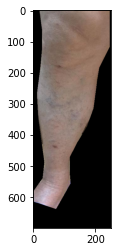

In [ ]:
def display_img(img,label):
    print(f"Label : {dataset.classes[label]}")
    plt.imshow(img.permute(1,2,0))

#display the first image in the dataset
display_img(*dataset_before[2])

Label : 01


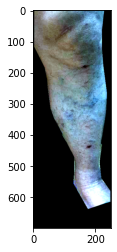

In [ ]:
def display_img(img,label):
    print(f"Label : {dataset.classes[label]}")
    plt.imshow(img.permute(1,2,0))

#display the first image in the dataset
display_img(*dataset[2])

In [ ]:
data_size = len(dataset)
train_sz = int(0.8 * data_size)
val_sz = data_size - train_sz 

In [ ]:
print(train_sz, val_sz)

172 43


In [26]:
train_sz, val_sz = 172, 43

In [27]:
train_data,val_data = random_split(dataset,[train_sz, val_sz])

batch_size = 1

train_dl = DataLoader(train_data, batch_size, shuffle = True, num_workers = 2, pin_memory = True)
val_dl = DataLoader(val_data, batch_size, num_workers = 2, pin_memory = True)

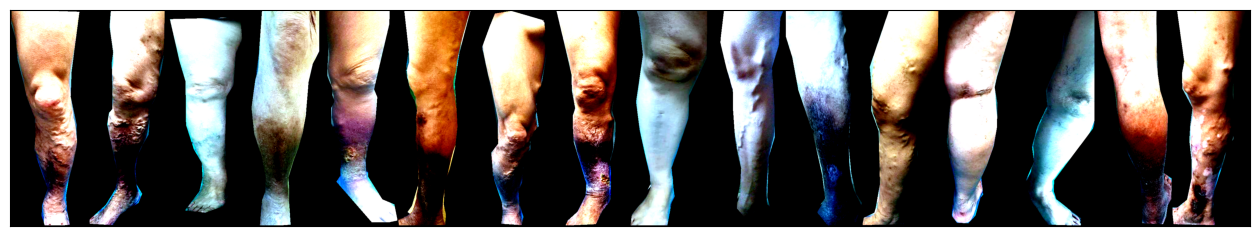

In [ ]:
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

def show_batch(dl):
    """Plot images grid of single batch"""
    for images, labels in dl:
        fig,ax = plt.subplots(figsize = (16,12))
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(make_grid(images,nrow=16).permute(1,2,0))
        break
        
show_batch(train_dl)

In [ ]:
train_data_before,val_data_before = random_split(dataset_before,[train_sz, val_sz])

batch_size = 1

train_dl_before = DataLoader(train_data_before, batch_size, shuffle = True, num_workers = 2, pin_memory = True)
val_dl_before = DataLoader(val_data_before, batch_size, num_workers = 2, pin_memory = True)

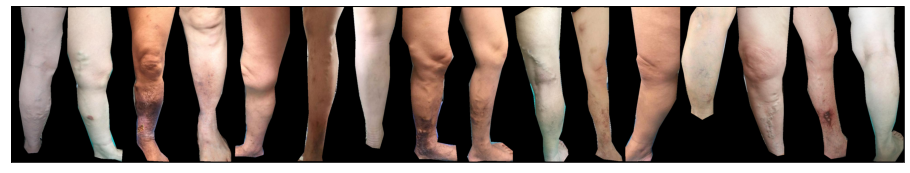

In [ ]:
show_batch(train_dl_before)

#### Second attempt 

In [ ]:
class ConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            
            nn.Conv2d(3, 32, kernel_size = 3, padding = 1),
            nn.ReLU(),
            # nn.Dropout(0.1),
            # nn.Conv2d(16, 32, kernel_size = 3, padding = 1),
            # nn.ReLU(),
            # nn.Dropout(0.1),
            nn.Conv2d(32,16, kernel_size = 3, padding = 1),
            nn.ReLU(),
            # nn.Dropout(0.1),
            nn.MaxPool2d(2,2),
        )
        self.head = nn.Sequential(
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(32, 3),
        )

    def forward(self, xb):
        features = self.network(xb)
        features = features.mean(dim=(2, 3))
        logits = self.head(features)
        return logits


In [ ]:
def saveModel(name):
    path = "./best_model.pth"
    torch.save(model.state_dict(), path)
    wandb.save(f'{name}_checkpoint.pth')

def validation(loader, device, model, acc_class=False):

    model.eval()
    accuracy = 0.0
    loss_sum = 0.0
    total = 0.0
    f1_ = 0.0

    running_class_acc = [0.0, 0.0, 0.0]
    total_class = [0.0, 0.0, 0.0]
    
    with torch.no_grad():
        for (images, labels) in loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            accuracy += (predicted == labels).sum().item()

            if acc_class:
                for k in range(3):
                    total_class[k] += (labels == k).detach().cpu().numpy()[0]
                    running_class_acc[k] += ((predicted == labels) and (labels == k)).sum().item()

            f1_ += f1(outputs, labels).detach().cpu().item()
            loss = loss_fn(outputs, labels)
            loss_sum += loss.item()
    
    if acc_class:
        return loss_sum / len(loader), accuracy / total, f1_ / len(loader), running_class_acc, total_class

    return loss_sum / len(loader), accuracy / total, f1_ / len(loader)

In [ ]:
def train(num_epochs, device, train_loader, val_loader, name, acc_class=True, project='Fleb_project'):
    
    best = {
            'train': [0.0, 0.0, 0.0],
            'train classes' : [0.0, 0.0, 0.0],
            'val': [0.0, 0.0, 0.0],
            'val classes' : [0.0, 0.0, 0.0]
            }

    model.to(device)

    wandb.init(
      project=project, 
      name=name
      )

    for epoch in tqdm(range(num_epochs)):
        running_loss = 0.0
        running_acc = 0.0
        total = 0.0
        running_f1 = 0.0

        running_class_acc = [0.0, 0.0, 0.0]
        total_class = [0.0, 0.0, 0.0]

        for i, (images, labels) in enumerate(train_loader):
            
            images = images.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            running_acc += (predicted == labels).sum().item()

            running_f1 += f1(outputs, labels).detach().cpu().item()

            if acc_class:
                for k in range(3):
                    total_class[k] += (labels == k).detach().cpu().numpy()[0]
                    running_class_acc[k] += ((predicted == labels) and (labels == k)).sum().item()
    
            loss = loss_fn(outputs, labels)
            loss.backward()

            optimizer.step()

            running_loss += loss.item()

        cur_loss = running_loss / len(train_loader)
        cur_acc = (running_acc / total)
        cur_f1 = running_f1 / len(train_loader)

        if acc_class:
            val_loss, val_acc, val_f1, val_classes_acc, total_classes_val = validation(val_loader, device, model, acc_class)
        else:
            val_loss, val_acc, val_f1 = validation(val_loader, device, model, acc_class)

        wandb.log({"train loss":cur_loss, "val loss": val_loss, 
                   "train F1":cur_f1, "val F1": val_f1, 
                   "train accuracy": cur_acc, "val accuracy":val_acc})
        
        # print(running_class_acc, total_class, val_classes_acc, total_classes_val, running_class_acc[0] / total_class[0])

        # return

        if val_acc > best['val'][1]:
            saveModel(name)
            best['train'] = cur_loss, cur_acc, cur_f1
            best['val'] = val_loss, val_acc, val_f1
            if acc_class:
                best['train classes'] = running_class_acc[0]/total_class[0], \
                                        running_class_acc[1]/total_class[1], \
                                        running_class_acc[2]/total_class[2]

                best['val classes'] = val_classes_acc[0]/total_classes_val[0], \
                                      val_classes_acc[1]/total_classes_val[1], \
                                      val_classes_acc[2]/total_classes_val[2]

    return best            

In [ ]:
model = ConvNet()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("The model will be running on", device, "device")

loss_fn = nn.CrossEntropyLoss()
f1 = F1Score(task="multiclass", num_classes=3, average='micro').to(device)

optimizer = Adam(model.parameters(), lr=0.001, weight_decay=0.001)
# optimizer = SGD(model.parameters(), lr=1e-3, momentum=0.9, weight_decay=1e-3)

The model will be running on cuda:0 device


In [ ]:
best_metrics = train(20, device, train_dl, val_dl, 'Testing')

In [ ]:
best_metrics

{'train': (0.9572460571693819, 0.5523255813953488, 0.5523255813953488),
 'train classes': (0.46808510638297873, 0.0, 0.8795180722891566),
 'val': (0.8928084401197212, 0.6976744186046512, 0.6976744186046512),
 'val classes': (0.7692307692307693, 0.0, 0.9090909090909091)}

#### Leave one out

In [19]:
true_ids = [[], [], []]

for i in range(len(dataset)):
    true_ids[dataset[i][1]].append(i)

for i in range(3):
    true_ids[i] = torch.Tensor(true_ids[i])

In [ ]:
print(len(true_ids[0]), \
      len(true_ids[1]), \
      len(true_ids[2]), sep='\n')

60
50
105


In [13]:
SIZES = [6, 5, 10]
N_groups = 10
all_ids = torch.arange(len(dataset))

def leave_n_out(dataset, i, n):
    # i_0 = 1
    # n - group sizes [1, 2, 3]

    if (n[0] == n[1]) and (n[0] == n[1]):
        ids = torch.arange((i - 1) * n[0], i * n[0])
        ids = torch.cat((true_ids[0][ids], true_ids[1][ids], true_ids[2][ids])).int()
    else:
        ids0 = torch.arange((i - 1) * n[0], i * n[0])
        ids1 = torch.arange((i - 1) * n[1], i * n[1])
        ids2 = torch.arange((i - 1) * n[2], i * n[2])
        ids = torch.cat((true_ids[0][ids0], true_ids[1][ids1], true_ids[2][ids2])).int()
    
    mask = torch.ones(len(dataset), dtype=torch.bool)
    mask[ids.tolist()] = False
    cur_train = torch.utils.data.Subset(dataset, all_ids[mask])
    cur_val = torch.utils.data.Subset(dataset, ids)
    # print(ids)

    train_dl = DataLoader(cur_train, 1, shuffle = True, num_workers = 2, pin_memory = True)
    val_dl = DataLoader(cur_val, 1, num_workers = 2, pin_memory = True)

    return train_dl, val_dl

In [ ]:
metrics = []

len_dataset = len(dataset)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("The model will be running on", device, "device")


for i in range(1, N_groups + 1):
    
    model = ConvNet()
    loss_fn = nn.CrossEntropyLoss()
    f1 = F1Score(task="multiclass", num_classes=3, average='micro').to(device)
    optimizer = Adam(model.parameters(), lr=0.001, weight_decay=0.001)

    train_, val_ = leave_n_out(dataset, i, SIZES)
    best_metr = train(20, device, train_, val_, f'loocv_{i}_group_exp_', True ,'loocv_Fleb_project')
    metrics.append(best_metr)

metrics

In [ ]:
metrics

# cell reset - previous output

# [{'train': (0.8929381860016855, 0.6030927835051546, 0.6030927835051546),
# 		  'train classes': (0.6666666666666666, 0.0, 0.8526315789473684),
# 		  'val': (1.137868889030956, 0.5714285714285714, 0.5714285714285714),
# 		  'val classes': (0.5, 0.0, 0.9)},
# 		 {'train': (1.0010792059228593, 0.5309278350515464, 0.5309278350515464),
# 		  'train classes': (0.3148148148148148, 0.0, 0.9052631578947369),
# 		  'val': (0.9608756445703053, 0.6666666666666666, 0.6666666666666666),
# 		  'val classes': (0.8333333333333334, 0.0, 0.9)},
# 		 {'train': (0.9180535688305024, 0.5773195876288659, 0.5773195876288659),
# 		  'train classes': (0.6481481481481481, 0.0, 0.8105263157894737),
# 		  'val': (1.1052567554371697, 0.5714285714285714, 0.5714285714285714),
# 		  'val classes': (0.5, 0.0, 0.9)},
# 		 {'train': (0.9812474110999059, 0.5567010309278351, 0.5567010309278351),
# 		  'train classes': (0.42592592592592593, 0.0, 0.8947368421052632),
# 		  'val': (0.9802145603157225, 0.5714285714285714, 0.5714285714285714),
# 		  'val classes': (0.3333333333333333, 0.0, 1.0)},
# 		 {'train': (0.9743273542022582, 0.5567010309278351, 0.5567010309278351),
# 		  'train classes': (0.5370370370370371, 0.0, 0.8315789473684211),
# 		  'val': (0.9092769913730168, 0.7142857142857143, 0.7142857142857143),
# 		  'val classes': (0.8333333333333334, 0.0, 1.0)},
# 		 {'train': (0.9466267196250331, 0.5463917525773195, 0.5463917525773195),
# 		  'train classes': (0.6296296296296297, 0.0, 0.7578947368421053),
# 		  'val': (0.9579164712201982, 0.5714285714285714, 0.5714285714285714),
# 		  'val classes': (0.5, 0.0, 0.9)},
# 		 {'train': (0.9274179049066662, 0.5515463917525774, 0.5515463917525774),
# 		  'train classes': (0.48148148148148145, 0.0, 0.8526315789473684),
# 		  'val': (1.0585146092233204, 0.6190476190476191, 0.6190476190476191),
# 		  'val classes': (1.0, 0.0, 0.7)},
# 		 {'train': (0.959528210851335, 0.5515463917525774, 0.5515463917525774),
# 		  'train classes': (0.42592592592592593, 0.0, 0.8842105263157894),
# 		  'val': (0.9028273026148478, 0.7142857142857143, 0.7142857142857143),
# 		  'val classes': (1.0, 0.0, 0.9)},
# 		 {'train': (0.956914907724587, 0.5463917525773195, 0.5463917525773195),
# 		  'train classes': (0.46296296296296297,
# 		   0.022222222222222223,
# 		   0.8421052631578947),
# 		  'val': (0.8059916694959005, 0.6666666666666666, 0.6666666666666666),
# 		  'val classes': (0.6666666666666666, 0.0, 1.0)},
# 		 {'train': (0.9851037703992165, 0.5360824742268041, 0.5360824742268041),
# 		  'train classes': (0.42592592592592593, 0.0, 0.8526315789473684),
# 		  'val': (0.9001022094771975, 0.7142857142857143, 0.7142857142857143),
# 		  'val classes': (0.8333333333333334, 0.0, 1.0)}]

In [ ]:
avg_train_class_acc = [0, 0, 0]
avg_val_class_acc = [0, 0, 0]

for metric in metrics:
    avg_train_class_acc = [avg_train_class_acc[j] + metric['train classes'][j] for j in range(3)]
    avg_val_class_acc = [avg_val_class_acc[j] + metric['val classes'][j] for j in range(3)]

In [ ]:
avg_train_class_acc = [avg_train_class_acc[i] / 10 for i in range(3)]
avg_val_class_acc = [avg_val_class_acc[i] / 10 for i in range(3)]

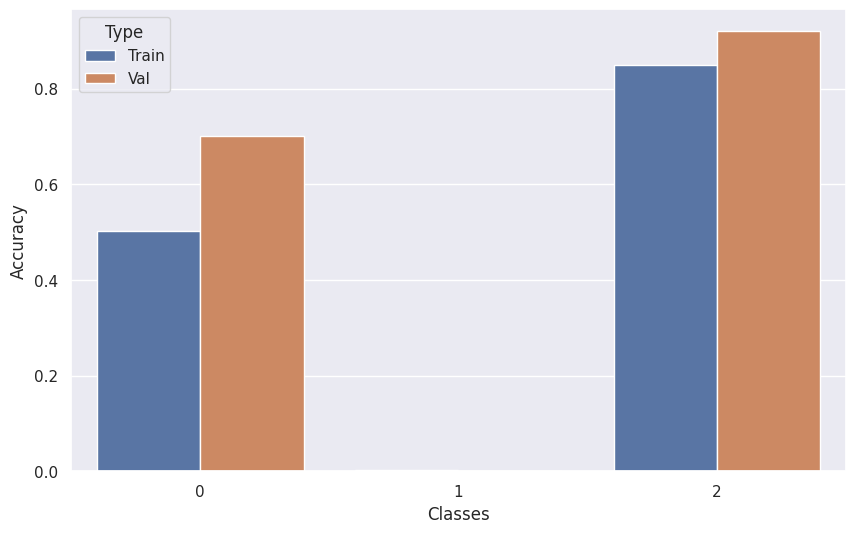

In [ ]:
import seaborn as sns
import pandas as pd
sns.set_theme(style="darkgrid")

df = pd.DataFrame(zip([0, 1, 2] * 2, ["Train"]*3+["Val"]*3, avg_train_class_acc + avg_val_class_acc ), columns=["Classes", "Type", "Accuracy"])

plt.figure(figsize=(10, 6))
sns.barplot(x="Classes", hue="Type", y="Accuracy", data=df)
plt.show()

##### attempt

In [ ]:
# def train_loocv(num_epochs, device, dataset, name):
    
#     best_accuracy = 0.0
    
#     len_dataset = len(dataset)


#     for i in range(1, N_groups + 1):
#         model = ConvNet()
#         model.to(device)

#         train, val = leave_n_out(dataset, i, SIZES)

#         wandb.init(
#             project="Fleb_project_LOOCV",
#             name=name+f"{i} group",
#             )

#         loocv_loss = 0.0
#         loocv_acc = 0.0
#         loocv_f1 = 0.0

#         loocv_train_loss = 0.0
#         loocv_train_f1 = 0.0
#         loocv_train_acc = 0.0

#         for epoch in tqdm(range(num_epochs)):
#             running_loss = 0.0
#             running_acc = 0.0
#             total = 0.0
#             running_f1 = 0.0

#             for i, (images, labels) in enumerate(train):
                
#                 images = images.to(device)
#                 labels = labels.to(device)

#                 optimizer.zero_grad()
#                 outputs = model(images)

#                 _, predicted = torch.max(outputs.data, 1)
#                 total += labels.size(0)
#                 running_acc += (predicted == labels).sum().item()

#                 running_f1 += f1(outputs, labels).detach().cpu().item()
        
#                 loss = loss_fn(outputs, labels)
#                 loss.backward()

#                 optimizer.step()

#                 running_loss += loss.item()

#             cur_loss = running_loss / len(train)
#             cur_acc = (running_acc / total)
#             cur_f1 = running_f1 / len(train)
            
#             val_loss, val_accuracy, val_f1 = validation(val, device, model)

#             # print(cur_f1, val_f1)
#             # print(type(cur_f1), type(val_f1))

#             wandb.log({"train loss":cur_loss, "val loss": val_loss, 
#                     "train F1":cur_f1, "val F1": val_f1, 
#                     "train accuracy": cur_acc, "val accuracy":val_accuracy})

#         # for epoch in tqdm(range(num_epochs)):

#         #     # train = train.to(device)
#         #     # val = val.to(device)

#         #     running_loss = 0.0
#         #     running_acc = 0.0
#         #     total0 = 0.0
#         #     total1 = 0.0
#         #     total2 = 0.0
#         #     running_f1 = 0.0

#         #     running_acc0 = 0.0
#         #     running_acc1 = 0.0
#         #     running_acc2 = 0.0
            
#         #     len_train = len(train)

#         #     for i, (images, labels) in enumerate(train):
            
#         #         images = images.to(device)
#         #         labels = labels.to(device)

#         #         optimizer.zero_grad()
#         #         outputs = model(images)

#         #         _, predicted = torch.max(outputs.data, 1)
#         #         total0 += (labels == 0)
#         #         total1 += (labels == 1)
#         #         total2 += (labels == 2)

#         #         running_acc += (predicted == labels).sum().item()
#         #         running_acc0 += ((predicted == labels) and (labels == 0)).sum().item()
#         #         running_acc1 += ((predicted == labels) and (labels == 1)).sum().item()
#         #         running_acc2 += ((predicted == labels) and (labels == 2)).sum().item()

#         #         running_f1 += f1(outputs, labels).detach().cpu().item()
        
#         #         loss = loss_fn(outputs, labels)
#         #         loss.backward()

#         #         optimizer.step()

#         #         running_loss += loss.item()

#         #     train_acc0 = running_acc0 / total0
#         #     train_acc1 = running_acc1 / total1
#         #     train_acc2 = running_acc2 / total2

#         #     cur_loss = running_loss / len(train)
#         #     cur_acc = (running_acc / len(train))
#         #     cur_f1 = running_f1 / len(train)
                        
#         #     loocv_train_loss += cur_loss
#         #     loocv_train_f1 += cur_f1
#         #     loocv_train_acc += cur_acc

#         #     val_loss, val_accuracy, val_f1, val_acc0, val_acc1, val_acc2 = validation(val, device, True)

#         #     loocv_loss += val_loss
#         #     loocv_acc += val_accuracy
#         #     loocv_f1 += val_f1

#         #     wandb.log({"train acc 0 class": train_acc0,
#         #                "train acc 1 class": train_acc1, 
#         #                "train acc 2 class": train_acc2,
#         #                "val acc 0 class": val_acc0,
#         #                "val acc 1 class": val_acc1, 
#         #                "val acc 2 class": val_acc2})



#         # wandb.log({"loocv loss": loocv_loss / N_groups,
#         #            "loocv F1": loocv_f1 / N_groups, 
#         #            "loocv accuracy": loocv_acc / N_groups,
#         #            "loocv_train loss": loocv_train_loss / N_groups,
#         #            "loocv_train F1": loocv_train_f1 / N_groups, 
#         #            "loocv_train accuracy": loocv_train_acc / N_groups})
        
#         # wandb.save('loocv_model_5_epochs.h5')
#         # if val_accuracy > best_accuracy:
#         #     saveModel(name)
#         #     best_accuracy = val_accuracy

In [ ]:
model = ConvNet()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("The model will be running on", device, "device")

loss_fn = nn.CrossEntropyLoss()
f1 = F1Score(task="multiclass", num_classes=3, average='micro').to(device)

optimizer = Adam(model.parameters(), lr=0.001, weight_decay=0.001)
# optimizer = SGD(model.parameters(), lr=1e-3, momentum=0.9, weight_decay=1e-3)

The model will be running on cuda:0 device


In [ ]:
train_loocv(20, device, dataset, '2. ')

train F1,▁█████████
train accuracy,▁█████████
train loss,█▁▁▁▁▁▁▁▁▁
val F1,▁▁▁▁▁▁▁▁▁▁
val accuracy,▁▁▁▁▁▁▁▁▁▁
val loss,▁▁▁▁▁▁▁▁▁▁
train F1,0.48969
train accuracy,0.48969
train loss,1.0749
val F1,0.47619
val accuracy,0.47619


  0%|          | 0/20 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f7262235940>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1479, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1462, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.9/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f7262235940>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1479, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1462, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

train F1,▁███████████████████
train accuracy,▁███████████████████
train loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val F1,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val accuracy,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val loss,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train F1,0.27835
train accuracy,0.27835
train loss,1.12137
val F1,0.28571
val accuracy,0.28571


  0%|          | 0/20 [00:00<?, ?it/s]

train F1,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train accuracy,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val F1,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val accuracy,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val loss,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train F1,0.24227
train accuracy,0.24227
train loss,1.08749
val F1,0.19048
val accuracy,0.19048


  0%|          | 0/20 [00:00<?, ?it/s]

train F1,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train accuracy,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val F1,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val accuracy,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val loss,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train F1,0.23196
train accuracy,0.23196
train loss,1.1228
val F1,0.2381
val accuracy,0.2381


  0%|          | 0/20 [00:00<?, ?it/s]

train F1,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train accuracy,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val F1,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val accuracy,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val loss,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train F1,0.23196
train accuracy,0.23196
train loss,1.11277
val F1,0.2381
val accuracy,0.2381


  0%|          | 0/20 [00:00<?, ?it/s]

train F1,▁███████████████████
train accuracy,▁███████████████████
train loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val F1,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val accuracy,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val loss,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train F1,0.48969
train accuracy,0.48969
train loss,1.07353
val F1,0.47619
val accuracy,0.47619


  0%|          | 0/20 [00:00<?, ?it/s]

train F1,▁███████████████████
train accuracy,▁███████████████████
train loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val F1,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val accuracy,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val loss,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train F1,0.27835
train accuracy,0.27835
train loss,1.11938
val F1,0.28571
val accuracy,0.28571


  0%|          | 0/20 [00:00<?, ?it/s]

train F1,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train accuracy,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train loss,▁███████████████████
val F1,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val accuracy,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val loss,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train F1,0.23196
train accuracy,0.23196
train loss,1.10977
val F1,0.2381
val accuracy,0.2381


  0%|          | 0/20 [00:00<?, ?it/s]

train F1,▁███████████████████
train accuracy,▁███████████████████
train loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val F1,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val accuracy,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val loss,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train F1,0.48969
train accuracy,0.48969
train loss,1.08127
val F1,0.47619
val accuracy,0.47619


  0%|          | 0/20 [00:00<?, ?it/s]

train F1,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train accuracy,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val F1,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val accuracy,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val loss,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train F1,0.27835
train accuracy,0.27835
train loss,1.10284
val F1,0.28571
val accuracy,0.28571


  0%|          | 0/20 [00:00<?, ?it/s]

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 58.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 67.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 19.9 MB/s eta 0:00:00


#### Augmentations

In [ ]:
data_dir = "/content/drive/MyDrive/datasets"

mean = torch.tensor([0.4012, 0.3164, 0.2782]) 
std = torch.tensor([0.3668, 0.2921, 0.2591])

transform = transforms.Compose([
    transforms.Resize((700,250)),
    transforms.RandomHorizontalFlip(p=0.1),
    transforms.RandomPerspective(p=0.1),
    # transforms.GaussianBlur(kernel_size=(3, 3)),
    # transforms.RandomAdjustSharpness(2),

    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

#load the train and test data
dataset = ImageFolder(data_dir,transform = transform)

In [ ]:
aug_metrics = []

len_dataset = len(dataset)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("The model will be running on", device, "device")


for i in range(1, N_groups + 1):
    
    model = ConvNet()
    loss_fn = nn.CrossEntropyLoss()
    f1 = F1Score(task="multiclass", num_classes=3, average='micro').to(device)
    optimizer = Adam(model.parameters(), lr=0.001, weight_decay=0.001)

    train_, val_ = leave_n_out(dataset, i, SIZES)
    best_metr = train(20, device, train_, val_, f'loocv_{i}_group_flip_persp', True ,'Augmentation_loocv_Fleb_project')
    aug_metrics.append(best_metr)

aug_metrics

In [ ]:
aug_metrics

[{'train': (0.954526736602648, 0.5824742268041238, 0.5824742268041238),
  'train classes': (0.5925925925925926, 0.0, 0.8526315789473684),
  'val': (1.1128766685724258, 0.5714285714285714, 0.5714285714285714),
  'val classes': (0.5, 0.0, 0.9)},
 {'train': (0.9644082200895879, 0.5515463917525774, 0.5515463917525774),
  'train classes': (0.5555555555555556, 0.0, 0.8105263157894737),
  'val': (0.944074463276636, 0.6666666666666666, 0.6666666666666666),
  'val classes': (0.8333333333333334, 0.0, 0.9)},
 {'train': (0.9422847348620597, 0.5412371134020618, 0.5412371134020618),
  'train classes': (0.5, 0.0, 0.8210526315789474),
  'val': (1.0556890978699638, 0.5714285714285714, 0.5714285714285714),
  'val classes': (0.6666666666666666, 0.0, 0.8)},
 {'train': (1.0921440136801337, 0.3865979381443299, 0.3865979381443299),
  'train classes': (0.018518518518518517,
   0.3333333333333333,
   0.6210526315789474),
  'val': (1.053377213932219, 0.6666666666666666, 0.6666666666666666),
  'val classes': (0.

In [ ]:
# for full augmentation

# [{'train': (0.9570551178197271, 0.5515463917525774, 0.5515463917525774),
#   'train classes': (0.5, 0.0, 0.8421052631578947),
#   'val': (1.0561928216900145, 0.5714285714285714, 0.5714285714285714),
#   'val classes': (0.3333333333333333, 0.0, 1.0)},
#  {'train': (0.9721722740334334, 0.5309278350515464, 0.5309278350515464),
#   'train classes': (0.48148148148148145, 0.0, 0.8105263157894737),
#   'val': (0.9736915145601545, 0.6666666666666666, 0.6666666666666666),
#   'val classes': (0.8333333333333334, 0.0, 0.9)},
#  {'train': (0.9886965132558468, 0.5515463917525774, 0.5515463917525774),
#   'train classes': (0.46296296296296297, 0.0, 0.8631578947368421),
#   'val': (1.0244897263390678, 0.5714285714285714, 0.5714285714285714),
#   'val classes': (0.8333333333333334, 0.0, 0.7)},
#  {'train': (0.9980041764907002, 0.5515463917525774, 0.5515463917525774),
#   'train classes': (0.42592592592592593, 0.0, 0.8842105263157894),
#   'val': (1.0140698921112787, 0.5714285714285714, 0.5714285714285714),
#   'val classes': (0.6666666666666666, 0.0, 0.8)},
#  {'train': (0.965191284789867, 0.5567010309278351, 0.5567010309278351),
#   'train classes': (0.46296296296296297, 0.0, 0.8736842105263158),
#   'val': (0.9067009148143587, 0.6666666666666666, 0.6666666666666666),
#   'val classes': (0.6666666666666666, 0.0, 1.0)},
#  {'train': (0.9781639168096572, 0.5257731958762887, 0.5257731958762887),
#   'train classes': (0.42592592592592593, 0.0, 0.8315789473684211),
#   'val': (0.9451628270603362, 0.6190476190476191, 0.6190476190476191),
#   'val classes': (0.6666666666666666, 0.0, 0.9)},
#  {'train': (0.9408336026766866, 0.5515463917525774, 0.5515463917525774),
#   'train classes': (0.48148148148148145, 0.0, 0.8526315789473684),
#   'val': (1.078454898936408, 0.6190476190476191, 0.6190476190476191),
#   'val classes': (1.0, 0.0, 0.7)},
#  {'train': (0.9581454834833587, 0.5515463917525774, 0.5515463917525774),
#   'train classes': (0.48148148148148145, 0.0, 0.8526315789473684),
#   'val': (0.8942104939903531, 0.7142857142857143, 0.7142857142857143),
#   'val classes': (0.8333333333333334, 0.0, 1.0)},
#  {'train': (1.0186387457183956, 0.5103092783505154, 0.5103092783505154),
#   'train classes': (0.25925925925925924, 0.0, 0.8947368421052632),
#   'val': (0.9787193281309945, 0.6666666666666666, 0.6666666666666666),
#   'val classes': (0.6666666666666666, 0.0, 1.0)},
#  {'train': (0.9595591789591558, 0.5618556701030928, 0.5618556701030928),
#   'train classes': (0.5370370370370371, 0.0, 0.8421052631578947),
#   'val': (0.8806366296041579, 0.7142857142857143, 0.7142857142857143),
#   'val classes': (0.8333333333333334, 0.0, 1.0)}]

In [ ]:
avg_train_class_acc = [0, 0, 0]
avg_val_class_acc = [0, 0, 0]

for metric in aug_metrics:
    avg_train_class_acc = [avg_train_class_acc[j] + metric['train classes'][j] for j in range(3)]
    avg_val_class_acc = [avg_val_class_acc[j] + metric['val classes'][j] for j in range(3)]

In [ ]:
avg_train_class_acc = [avg_train_class_acc[i] / 10 for i in range(3)]
avg_val_class_acc = [avg_val_class_acc[i] / 10 for i in range(3)]

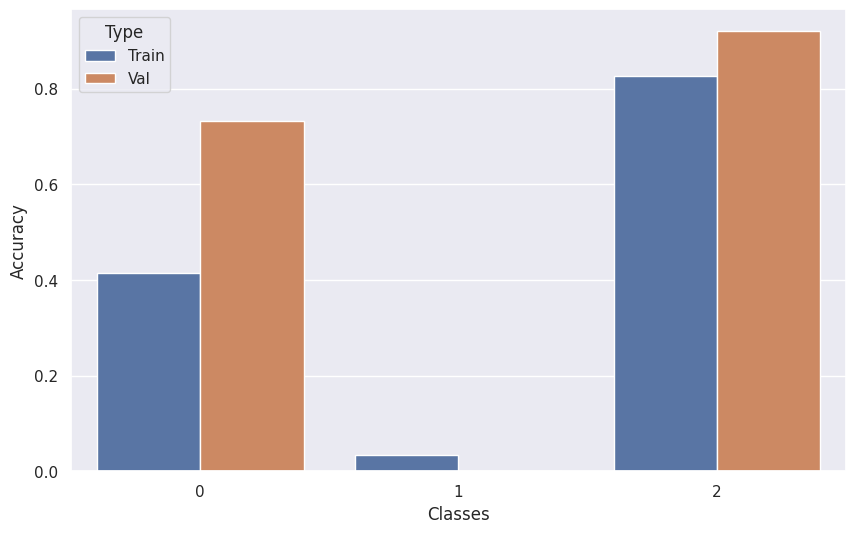

In [ ]:
df = pd.DataFrame(zip([0, 1, 2] * 2, ["Train"]*3+["Val"]*3, avg_train_class_acc + avg_val_class_acc ), columns=["Classes", "Type", "Accuracy"])

plt.figure(figsize=(10, 6))
sns.barplot(x="Classes", hue="Type", y="Accuracy", data=df)
plt.show()

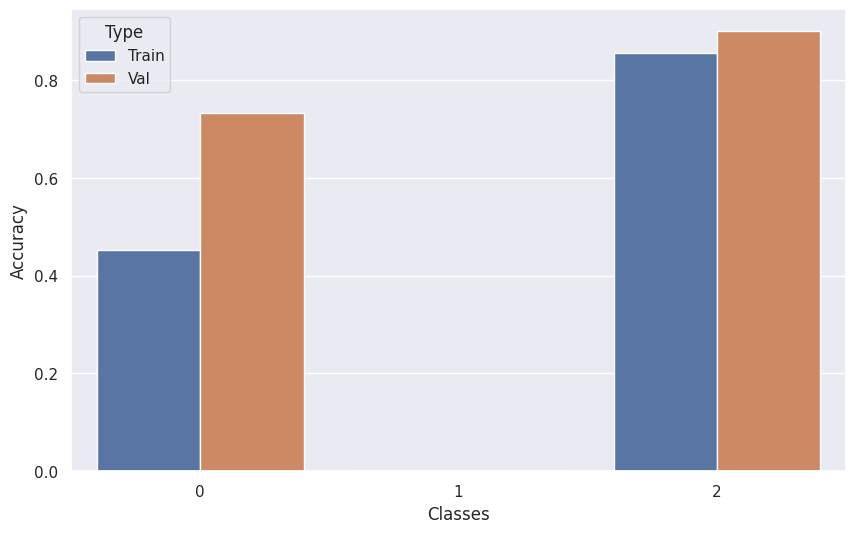

In [ ]:
df = pd.DataFrame(zip([0, 1, 2] * 2, ["Train"]*3+["Val"]*3, avg_train_class_acc + avg_val_class_acc ), columns=["Classes", "Type", "Accuracy"])

plt.figure(figsize=(10, 6))
sns.barplot(x="Classes", hue="Type", y="Accuracy", data=df)
plt.show()

In [ ]:
# random perspective and horizontal flip augmentations
trains = [0, 0, 0]
vals = [0, 0, 0]
for metric in aug_metrics:
    trains = [trains[j] + metric['train'][j] for j in range(3)]
    vals = [vals[j] + metric['val'][j] for j in range(3)]

trains = [trains[i] / 10 for i in range(3)]
vals = [vals[i] / 10 for i in range(3)]

print(trains,'\n', vals)

[0.9801152379242415, 0.5278350515463917, 0.5278350515463917] 
 [0.9737321178827966, 0.6476190476190478, 0.6476190476190478]


In [ ]:
# all augmentations
trains = [0, 0, 0]
vals = [0, 0, 0]
for metric in aug_metrics:
    trains = [trains[j] + metric['train'][j] for j in range(3)]
    vals = [vals[j] + metric['val'][j] for j in range(3)]

trains = [trains[i] / 10 for i in range(3)]
vals = [vals[i] / 10 for i in range(3)]

In [ ]:
print(trains,'\n', vals)

[0.9736460294036829, 0.5443298969072164, 0.5443298969072164] 
 [0.9752329047237124, 0.6380952380952382, 0.6380952380952382]


In [ ]:
# no_augmentations

trains = [0, 0, 0]
vals = [0, 0, 0]
for metric in metrics:
    trains = [trains[j] + metric['train'][j] for j in range(3)]
    vals = [vals[j] + metric['val'][j] for j in range(3)]

trains = [trains[i] / 10 for i in range(3)]
vals = [vals[i] / 10 for i in range(3)]

In [ ]:
print(trains,'\n', vals)

[0.954323723956405, 0.5556701030927834, 0.5556701030927834] 
 [0.9718845102758635, 0.6380952380952383, 0.6380952380952383]


#### CNN Arcitecture

In [ ]:
# more iteration

class ConvNet2(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            
            nn.Conv2d(3, 32, kernel_size = 3, padding = 1),
            nn.ReLU(),
            # nn.Dropout(0.1),
            # nn.Conv2d(16, 32, kernel_size = 3, padding = 1),
            # nn.ReLU(),
            # nn.Dropout(0.1),
            nn.Conv2d(32,16, kernel_size = 3, padding = 1),
            nn.ReLU(),
            # nn.Dropout(0.1),
            nn.MaxPool2d(2,2),
        )
        self.head = nn.Sequential(
            nn.Linear(16, 32),
            nn.ReLU(),
            # nn.Dropout(0.1),
            nn.Linear(32, 3)
        )

    def forward(self, xb):
        features = self.network(xb)
        features = features.mean(dim=(2, 3))
        logits = self.head(features)
        return logits


In [ ]:
cnn_metrics = []

len_dataset = len(dataset)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("The model will be running on", device, "device")


for i in range(1, N_groups + 1):
    
    model = ConvNet2()
    loss_fn = nn.CrossEntropyLoss()
    f1 = F1Score(task="multiclass", num_classes=3, average='micro').to(device)
    optimizer = Adam(model.parameters(), lr=0.001, weight_decay=0.001)

    train_, val_ = leave_n_out(dataset, i, SIZES)
    best_metr = train(20, device, train_, val_, f'loocv_{i}_group_no_dropout', True ,'loocv_Fleb_project')
    cnn_metrics.append(best_metr)

cnn_metrics

The model will be running on cuda:0 device


train F1,▁▁▁▁▁▂▁▅▃▅▃▃▅▄▆▅▅▄█▆
train accuracy,▁▁▁▁▁▂▁▅▃▅▃▃▅▄▆▅▅▄█▆
train loss,█▇▆▅▅▄▃▃▃▂▂▃▂▂▂▂▂▁▁▁
val F1,▁▁▁▁▂▁▁▂▁█▄█▅▅▇▇██▇▅
val accuracy,▁▁▁▁▂▁▁▂▁█▄█▅▅▇▇██▇▅
val loss,██▇▇▆▅▄▂▅▁▃▂▂▄▂▁▂▂▃▃
train F1,0.55155
train accuracy,0.55155
train loss,0.95459
val F1,0.61905
val accuracy,0.61905


  0%|          | 0/20 [00:00<?, ?it/s]

train F1,▁▄▇▅▇▆▆▅█▅▆▇▆▇▇█▇▅▇▅
train accuracy,▁▄▇▅▇▆▆▅█▅▆▇▆▇▇█▇▅▇▅
train loss,█▆▄▃▃▃▂▃▂▂▂▂▂▂▁▁▂▂▁▁
val F1,▆▆▁▇▇▄▃▇▃▇▄▂▃▄▄▇▃▇▆█
val accuracy,▆▆▁▇▇▄▃▇▃▇▄▂▃▄▄▇▃▇▆█
val loss,▁▁█▁▂▄▅▂▆▃▅▇▆▆▅▇▆▃▄▄
train F1,0.54124
train accuracy,0.54124
train loss,0.91762
val F1,0.57143
val accuracy,0.57143


  0%|          | 0/20 [00:00<?, ?it/s]

train F1,▁▄▄▅▆▇▆▇▆█▇▆▆▇▆▇▇▆▇█
train accuracy,▁▄▄▅▆▇▆▇▆█▇▆▆▇▆▇▇▆▇█
train loss,█▆▆▄▄▃▃▃▂▂▂▃▃▂▃▃▂▂▃▁
val F1,▁▁▁▆▃▆▃▃█▆▆▆▆▃▆█▃█▆█
val accuracy,▁▁▁▆▃▆▃▃█▆▆▆▆▃▆█▃█▆█
val loss,▆▅▆▁▄▂▂▅▂▂▄▂▂█▃▁▆▂▂▁
train F1,0.57732
train accuracy,0.57732
train loss,0.91129
val F1,0.61905
val accuracy,0.61905


  0%|          | 0/20 [00:00<?, ?it/s]

train F1,▂▂▂▁▆▇▆▅▆▇▄▇▄▆█▆▇███
train accuracy,▂▂▂▁▆▇▆▅▆▇▄▇▄▆█▆▇███
train loss,█▇▇▆▃▃▃▃▃▂▃▁▂▂▃▂▁▁▁▁
val F1,▄▄▄▄▁▃▃█▃▁▃▃▃▃▄▃▆▆▆▆
val accuracy,▄▄▄▄▁▃▃█▃▁▃▃▃▃▄▃▆▆▆▆
val loss,▁▁▁▃▃▂▃▂▃▆▄▅▅▄▃▄▃█▄▁
train F1,0.58247
train accuracy,0.58247
train loss,0.922
val F1,0.52381
val accuracy,0.52381


  0%|          | 0/20 [00:00<?, ?it/s]

train F1,▁▁▂▃▅▇███▇▆▆▆▇▇▇▇▇▇█
train accuracy,▁▁▂▃▅▇███▇▆▆▆▇▇▇▇▇▇█
train loss,█▇▆▅▄▃▂▂▂▂▂▃▂▃▁▂▂▁▁▁
val F1,▄▄▄▁▄█▇▄▄▂▄▄▇▅▂▂▅▄▄▄
val accuracy,▄▄▄▁▄█▇▄▄▂▄▄▇▅▂▂▅▄▄▄
val loss,▇▇▆▇▅▂▁▅▆▇▇▅▄▆▆▆▅█▅▂
train F1,0.58247
train accuracy,0.58247
train loss,0.93361
val F1,0.47619
val accuracy,0.47619


  0%|          | 0/20 [00:00<?, ?it/s]

train F1,▁▁▃▅▅▅▅▄▇█▆▆▅▇▆▇▃▇▂▆
train accuracy,▁▁▃▅▅▅▅▄▇█▆▆▅▇▆▇▃▇▂▆
train loss,█▇▄▃▃▃▃▂▃▂▂▂▃▂▂▂▂▁▂▁
val F1,▁▁█▅▃▅▆▆▆▃▆▆▁▆▁▅▁▆█▃
val accuracy,▁▁█▅▃▅▆▆▆▃▆▆▁▆▁▅▁▆█▃
val loss,▅▅▃▂▄▅▂▂▁▃▂▁▃▂█▃▄▁▁▂
train F1,0.54639
train accuracy,0.54639
train loss,0.95278
val F1,0.52381
val accuracy,0.52381


  0%|          | 0/20 [00:00<?, ?it/s]

train F1,▁▄▅▇▅▇▇▆▆▇▇▆▇█▇▆█▅▇▇
train accuracy,▁▄▅▇▅▇▇▆▆▇▇▆▇█▇▆█▅▇▇
train loss,█▇▆▅▄▃▂▃▄▃▃▃▄▂▃▂▁▃▂▁
val F1,▁▅▅█▅▅▅█▅█▅██▁██▅█▅▁
val accuracy,▁▅▅█▅▅▅█▅█▅██▁██▅█▅▁
val loss,██▃▃▃▇▄▅▃▃▄▁▁▆▂▃▇▂█▇
train F1,0.56186
train accuracy,0.56186
train loss,0.93893
val F1,0.47619
val accuracy,0.47619


  0%|          | 0/20 [00:00<?, ?it/s]

train F1,▁▃▆▃▆▅▅▅▇▆▅▆▆▇▆█▆▆▆█
train accuracy,▁▃▆▃▆▅▅▅▇▆▅▆▆▇▆█▆▆▆█
train loss,█▆▅▅▃▃▂▃▃▃▃▂▃▂▂▂▂▂▁▁
val F1,▄█▂▂▄▂▂▁▁▂▂▁▁▂▁▄▂▂▅▂
val accuracy,▄█▂▂▄▂▂▁▁▂▂▁▁▂▁▄▂▂▅▂
val loss,▃▂▄▃▂▅█▅▃▂▃▄▄▄▄▃▃▃▁▄
train F1,0.59794
train accuracy,0.59794
train loss,0.92388
val F1,0.42857
val accuracy,0.42857


  0%|          | 0/20 [00:00<?, ?it/s]

train F1,▁▂▂▂▃▃▃▂▄▅▇▅▇█▇█▆█▇█
train accuracy,▁▂▂▂▃▃▃▂▄▅▇▅▇█▇█▆█▇█
train loss,█▇▇▇▆▅▄▅▄▃▃▃▃▃▃▂▃▂▁▂
val F1,▁▁▁▁▁▁██▅▇▅▅▄▅▅▅▅▇▇▇
val accuracy,▁▁▁▁▁▁██▅▇▅▅▄▅▅▅▅▇▇▇
val loss,██▇▇▅▆▅▄▄▃▂▆▆▃▃▂▃▂▁▁
train F1,0.57732
train accuracy,0.57732
train loss,0.93437
val F1,0.66667
val accuracy,0.66667


  0%|          | 0/20 [00:00<?, ?it/s]

train F1,▁▂▄▄▆▄▅▄▆▅▆▆▇▇▇▇█▆██
train accuracy,▁▂▄▄▆▄▅▄▆▅▆▆▇▇▇▇█▆██
train loss,█▇▆▅▃▄▄▃▃▂▂▁▁▂▁▂▁▂▁▁
val F1,▁▁▅▁▁▅▅▁▅▅█▁▁▅▅▁█▅▅▅
val accuracy,▁▁▅▁▁▅▅▁▅▅█▁▁▅▅▁█▅▅▅
val loss,█▇▆▆▇▄▄▃▂▂▁▃▄▂▁▄▂▂▁▃
train F1,0.56701
train accuracy,0.56701
train loss,0.95695
val F1,0.52381
val accuracy,0.52381


  0%|          | 0/20 [00:00<?, ?it/s]

[{'train': (0.9176158054357337, 0.5412371134020618, 0.5412371134020618),
  'train classes': (0.6111111111111112, 0.0, 0.7578947368421053),
  'val': (1.1179776177519845, 0.5714285714285714, 0.5714285714285714),
  'val classes': (0.5, 0.0, 0.9)},
 {'train': (0.9352729590897707, 0.5412371134020618, 0.5412371134020618),
  'train classes': (0.42592592592592593, 0.0, 0.8631578947368421),
  'val': (0.9758325545560746, 0.6190476190476191, 0.6190476190476191),
  'val classes': (0.6666666666666666, 0.0, 0.9)},
 {'train': (0.9631214472129173, 0.5360824742268041, 0.5360824742268041),
  'train classes': (0.5, 0.0, 0.8105263157894737),
  'val': (1.067488112619945, 0.5714285714285714, 0.5714285714285714),
  'val classes': (0.5, 0.0, 0.9)},
 {'train': (0.96576892377175, 0.5618556701030928, 0.5618556701030928),
  'train classes': (0.48148148148148145, 0.0, 0.8736842105263158),
  'val': (0.947084333215441, 0.6190476190476191, 0.6190476190476191),
  'val classes': (0.6666666666666666, 0.0, 0.9)},
 {'trai

In [ ]:
avg_train_class_acc = [0, 0, 0]
avg_val_class_acc = [0, 0, 0]

for metric in cnn_metrics:
    avg_train_class_acc = [avg_train_class_acc[j] + metric['train classes'][j] for j in range(3)]
    avg_val_class_acc = [avg_val_class_acc[j] + metric['val classes'][j] for j in range(3)]

In [ ]:
avg_train_class_acc = [avg_train_class_acc[i] / 10 for i in range(3)]
avg_val_class_acc = [avg_val_class_acc[i] / 10 for i in range(3)]

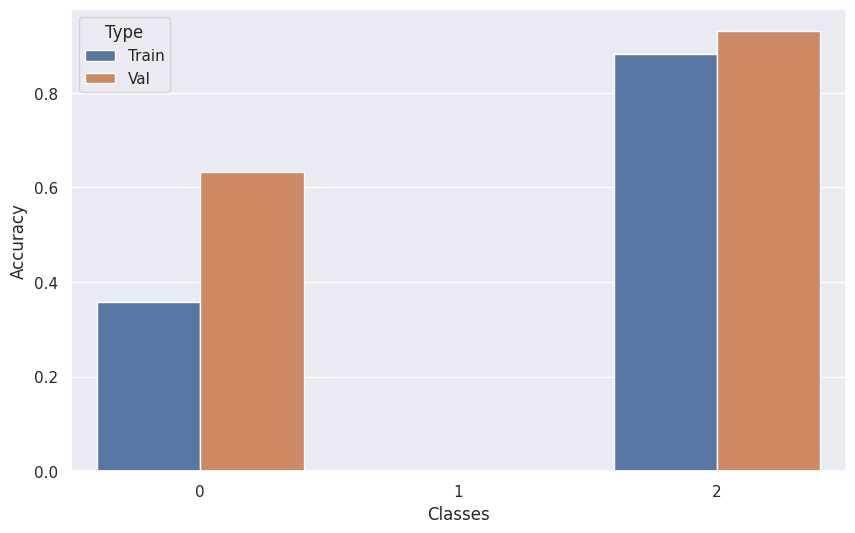

In [ ]:
df = pd.DataFrame(zip([0, 1, 2] * 2, ["Train"]*3+["Val"]*3, avg_train_class_acc + avg_val_class_acc ), columns=["Classes", "Type", "Accuracy"])

plt.figure(figsize=(10, 6))
sns.barplot(x="Classes", hue="Type", y="Accuracy", data=df)
plt.show()

In [ ]:
# no_augmentations

trains = [0, 0, 0]
vals = [0, 0, 0]
for metric in cnn_metrics:
    trains = [trains[j] + metric['train'][j] for j in range(3)]
    vals = [vals[j] + metric['val'][j] for j in range(3)]

trains = [trains[i] / 10 for i in range(3)]
vals = [vals[i] / 10 for i in range(3)]

In [ ]:
print(trains, '\n', vals)

[0.975118725927374, 0.5314432989690722, 0.5314432989690722] 
 [0.9651049524545667, 0.6238095238095237, 0.6238095238095237]


#### SWIN - 0.3209

In [ ]:
data_dir = "/content/drive/MyDrive/datasets"

transform = transforms.Compose([
    transforms.Resize((700,250)),
    # transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    # transforms.Normalize(mean, std)
])

#load the train and test data
dataset = ImageFolder(data_dir,transform = transform)

In [ ]:
from transformers import AutoImageProcessor, SwinForImageClassification
import torch

image_processor = AutoImageProcessor.from_pretrained("microsoft/swin-tiny-patch4-window7-224")
model = SwinForImageClassification.from_pretrained("microsoft/swin-tiny-patch4-window7-224")

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


In [ ]:
# model

In [ ]:
model.classifier = nn.Linear(in_features=768, out_features=3, bias=True)

In [ ]:
# train, test = random_split(dataset,[train_sz, val_sz])

train_dl = DataLoader(dataset, 1, shuffle = True, num_workers = 2, pin_memory = True)

In [ ]:
images = [image[0] for (image, l) in train_dl]
labels = [label[0] for (i, label) in train_dl]

In [ ]:
inputs = image_processor(images, return_tensors="pt")

with torch.no_grad():
    logits = model(**inputs).logits

In [ ]:
predicted_label = logits.argmax(-1)
predicted_label

tensor([0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 0, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2,
        2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1,
        0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 1, 2, 0, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0,
        0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2,
        0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2, 2,
        2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 2,
        0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2,
        2, 2, 2, 1, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2])

In [ ]:
f1 = F1Score(task="multiclass", num_classes=3)
f1(torch.tensor(labels), predicted_label)

tensor(0.3209)

In [ ]:
from transformers import get_scheduler
from torch.optim import AdamW

num_epochs = 10
optimizer = AdamW(model.parameters(), lr=5e-5)
lr_scheduler = get_scheduler(
    name="linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=num_epochs * len(train_dl)
)

In [ ]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)

In [ ]:
cur_loss = []
cur_acc = []
cur_f1 = []

for epoch in tqdm(range(num_epochs)):
    running_loss = 0.0
    running_acc = 0.0
    total = 0.0
    running_f1 = 0.0

    for i, (images, labels) in enumerate(train_dl):
        
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(images).logits

        predicted = outputs.argmax(-1)
        total += labels.size(0)
        running_acc += (predicted == labels).sum().item()

        running_f1 += f1(outputs, labels).detach().cpu().item()

        loss = loss_fn(outputs, labels)
        loss.backward()

        optimizer.step()
        lr_scheduler.step()

        running_loss += loss.item()

    cur_loss.append(running_loss / len(train_dl))
    cur_acc.append((running_acc / total))
    cur_f1.append(running_f1 / len(train_dl))

  0%|          | 0/10 [00:00<?, ?it/s]

In [ ]:
images = [image for (image, l) in test]
labels = [label for (i, label) in test]
inputs = image_processor(images, return_tensors="pt").to(device)

with torch.no_grad():
    logits = model(**inputs).logits

In [ ]:
predicted_label = logits.argmax(-1)
predicted_label

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       device='cuda:0')

In [ ]:
f1 = F1Score(task="multiclass", num_classes=3)
f1(torch.tensor(labels), predicted_label.detach().cpu())

tensor(0.2093)

#### VIT - 0.2326

In [ ]:
from transformers import AutoImageProcessor, ViTForImageClassification
import torch

image_processor = AutoImageProcessor.from_pretrained("google/vit-base-patch16-224")
model = ViTForImageClassification.from_pretrained("google/vit-base-patch16-224")

inputs = image_processor(images, return_tensors="pt")

In [ ]:
# model

In [ ]:
model.classifier = nn.Linear(in_features=768, out_features=3, bias=True)

In [ ]:
with torch.no_grad():
    logits = model(**inputs).logits

In [ ]:
predicted_label = logits.argmax(-1)
predicted_label

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
f1 = F1Score(task="multiclass", num_classes=3)
f1(torch.tensor(labels), predicted_label)

tensor(0.2326)

### Genetic Algorithm

In [15]:
class CNN(nn.Module):
    def __init__(self,nfilters,sfilters):
        super().__init__()
        self.network = nn.Sequential(
            
            nn.Conv2d(3, nfilters[0], kernel_size = sfilters[0], padding = 1),
            nn.ReLU(),
            nn.Conv2d(nfilters[0],nfilters[1], kernel_size = sfilters[1], padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
        )
        self.head = nn.Sequential(
            nn.Linear(nfilters[1], nfilters[2]),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(nfilters[2], 3)
        )

    def forward(self, xb):
        features = self.network(xb)
        features = features.mean(dim=(2, 3))
        logits = self.head(features)
        return logits

In [24]:
class Genetic:
    
    def __init__(self,pop_size,nlayers,max_nfilters,max_sfilters):
        self.pop_size = pop_size
        self.nlayers = nlayers
        self.max_nfilters = max_nfilters
        self.max_sfilters = max_sfilters
        self.max_acc = 0
        self.best_arch = np.zeros((1,6))
        self.gen_acc = []
    
    def generate_population(self):
        np.random.seed(0)
        pop_nlayers = np.random.randint(1,self.max_nfilters,(self.pop_size,self.nlayers))
        pop_sfilters = np.random.randint(1,self.max_sfilters,(self.pop_size,self.nlayers))
        pop_total = np.concatenate((pop_nlayers,pop_sfilters),axis=1)
        return pop_total
    
    def select_parents(self,pop,nparents,fitness):
        parents = np.zeros((nparents,pop.shape[1]))
        for i in range(nparents):
            best = np.argmax(fitness)
            parents[i] = pop[best]
            fitness[best] = -99999
        return parents
    
    def crossover(self,parents):
        nchild = self.pop_size - parents.shape[0]
        nparents = parents.shape[0]
        child = np.zeros((nchild,parents.shape[1]))
        for i in range(nchild):
            first = i % nparents
            second = (i+1) % nparents
            child[i,:2] = parents[first][:2]
            child[i,2] = parents[second][2]
            child[i,3:5] = parents[first][3:5]
            child[i,5] = parents[second][5]
        return child

    def mutation(self,child):
        for i in range(child.shape[0]):
            val = np.random.randint(1,6)
            ind = np.random.randint(1,4) - 1
            if child[i][ind] + val > 100:
                child[i][ind] -= val
            else:
                child[i][ind] += val
            val = np.random.randint(1,4)
            ind = np.random.randint(4,7) - 1
            if child[i][ind] + val > 20:
                child[i][ind] -= val
            else:
                child[i][ind] += val
        return child
    
    def fitness(self,pop,train_loader,epochs):
        pop_acc = []
        for i in tqdm(range(pop.shape[0])):
            nfilters = pop[i][0:3]
            sfilters = pop[i][3:]
            model = CNN(nfilters,sfilters).to(device)
            loss_fn = nn.CrossEntropyLoss()
            optimizer = Adam(model.parameters(), lr=0.001, weight_decay=0.001)
            total = 0.0
            running_acc = 0.0
            for i, (images, labels) in enumerate(train_loader):
            
                images = images.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()
                outputs = model(images)

                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                running_acc += (predicted == labels).sum().item()
        
                loss = loss_fn(outputs, labels)
                loss.backward()
                optimizer.step()

            acc = running_acc / total
            # val_loss, val_acc, val_f1 = validation(val_dl, device, model, False)
            pop_acc.append(acc)
        if max(pop_acc) > self.max_acc:
            self.max_acc = max(pop_acc)
            self.best_arch = pop[np.argmax(pop_acc)]
        self.gen_acc.append(max(pop_acc))
        return pop_acc

In [14]:
def count_plot_print(metrics):
    avg_train_class_acc = [0, 0, 0]
    avg_val_class_acc = [0, 0, 0]

    for metric in metrics:
        avg_train_class_acc = [avg_train_class_acc[j] + metric['train classes'][j] for j in range(3)]
        avg_val_class_acc = [avg_val_class_acc[j] + metric['val classes'][j] for j in range(3)]

    avg_train_class_acc = [avg_train_class_acc[i] / 10 for i in range(3)]
    avg_val_class_acc = [avg_val_class_acc[i] / 10 for i in range(3)]

    df = pd.DataFrame(zip([0, 1, 2] * 2, ["Train"]*3+["Val"]*3, avg_train_class_acc + avg_val_class_acc ), columns=["Classes", "Type", "Accuracy"])

    plt.figure(figsize=(10, 6))
    sns.barplot(x="Classes", hue="Type", y="Accuracy", data=df)
    plt.show()

    trains = [0, 0, 0]
    vals = [0, 0, 0]
    for metric in metrics:
        trains = [trains[j] + metric['train'][j] for j in range(3)]
        vals = [vals[j] + metric['val'][j] for j in range(3)]

    trains = [trains[i] / 10 for i in range(3)]
    vals = [vals[i] / 10 for i in range(3)]

    print(trains, '\n', vals)

In [17]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [28]:
pop_size = 10 
nlayers = 3
max_nfilters = 100
max_sfilters = 10 # 20
epochs = 10
num_generations = 20

genCNN = Genetic(pop_size,nlayers,max_nfilters,max_sfilters)
pop = genCNN.generate_population()

for i in tqdm(range(num_generations+1)):
    pop_acc = genCNN.fitness(pop,train_dl,epochs)
    print('Best Accuracy at the generation {}: {}'.format(i,genCNN.max_acc))
    parents = genCNN.select_parents(pop,5,pop_acc.copy())
    child = genCNN.crossover(parents)
    child = genCNN.mutation(child)
    pop = np.concatenate((parents,child),axis=0).astype('int')

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Best Accuracy at the generation 0: 0.5116279069767442


  0%|          | 0/10 [00:00<?, ?it/s]

Best Accuracy at the generation 1: 0.5116279069767442


  0%|          | 0/10 [00:00<?, ?it/s]

Best Accuracy at the generation 2: 0.5174418604651163


  0%|          | 0/10 [00:00<?, ?it/s]

Best Accuracy at the generation 3: 0.5174418604651163


  0%|          | 0/10 [00:00<?, ?it/s]

Best Accuracy at the generation 4: 0.5232558139534884


  0%|          | 0/10 [00:00<?, ?it/s]

Best Accuracy at the generation 5: 0.5232558139534884


  0%|          | 0/10 [00:00<?, ?it/s]

Best Accuracy at the generation 6: 0.5232558139534884


  0%|          | 0/10 [00:00<?, ?it/s]

Best Accuracy at the generation 7: 0.5348837209302325


  0%|          | 0/10 [00:00<?, ?it/s]

Best Accuracy at the generation 8: 0.5348837209302325


  0%|          | 0/10 [00:00<?, ?it/s]

Best Accuracy at the generation 9: 0.5348837209302325


  0%|          | 0/10 [00:00<?, ?it/s]

Best Accuracy at the generation 10: 0.5348837209302325


  0%|          | 0/10 [00:00<?, ?it/s]

Best Accuracy at the generation 11: 0.5348837209302325


  0%|          | 0/10 [00:00<?, ?it/s]

Best Accuracy at the generation 12: 0.5348837209302325


  0%|          | 0/10 [00:00<?, ?it/s]

Best Accuracy at the generation 13: 0.5348837209302325


  0%|          | 0/10 [00:00<?, ?it/s]

Best Accuracy at the generation 14: 0.5348837209302325


  0%|          | 0/10 [00:00<?, ?it/s]

Best Accuracy at the generation 15: 0.5348837209302325


  0%|          | 0/10 [00:00<?, ?it/s]

Best Accuracy at the generation 16: 0.5348837209302325


  0%|          | 0/10 [00:00<?, ?it/s]

Best Accuracy at the generation 17: 0.5348837209302325


  0%|          | 0/10 [00:00<?, ?it/s]

Best Accuracy at the generation 18: 0.5348837209302325


  0%|          | 0/10 [00:00<?, ?it/s]

Best Accuracy at the generation 19: 0.5348837209302325


  0%|          | 0/10 [00:00<?, ?it/s]

Best Accuracy at the generation 20: 0.5348837209302325


In [30]:
genCNN.best_arch

array([86, 22, 69,  4,  7,  8])

In [31]:
nfilters = genCNN.best_arch[0:3]
sfilters = genCNN.best_arch[3:]


metrics = []

len_dataset = len(dataset)

for i in range(1, N_groups + 1):
    
    model = CNN(nfilters,sfilters).to(device)
    loss_fn = nn.CrossEntropyLoss()
    f1 = F1Score(task="multiclass", num_classes=3, average='micro').to(device)
    optimizer = Adam(model.parameters(), lr=0.001, weight_decay=0.001)

    train_, val_ = leave_n_out(dataset, i, SIZES)
    best_metr = train(20, device, train_, val_, f'loocv_{i}_group_long', True ,'GA_Fleb_project')
    metrics.append(best_metr)

train F1,▁▅▆▅▆▆▇█▆▅▇█▇▆▇▇▆▇▇▇
train accuracy,▁▅▆▅▆▆▇█▆▅▇█▇▆▇▇▆▇▇▇
train loss,█▆▆▄▄▄▃▂▃▂▂▁▂▁▂▁▂▂▁▁
val F1,▁▁▁▁▇▇▇▇▅▇▂█▇▁█▇▁▇▂▇
val accuracy,▁▁▁▁▇▇▇▇▅▇▂█▇▁█▇▁▇▂▇
val loss,█▆▅▇▃▃▂▂▂▂▃▂▂▃▂▂▃▂▂▁
train F1,0.53608
train accuracy,0.53608
train loss,0.96037
val F1,0.66667
val accuracy,0.66667


  0%|          | 0/20 [00:00<?, ?it/s]

train F1,▁▂▂▄▃▅▄▅▅▆█▆▆▄█▇▅██▇
train accuracy,▁▂▂▄▃▅▄▅▅▆█▆▆▄█▇▅██▇
train loss,█▆▅▅▅▅▂▃▃▃▂▃▃▂▂▁▂▁▂▃
val F1,█▇▄▅█▇▇▅▂▇▂█▄▅▅▅█▁▄▇
val accuracy,█▇▄▅█▇▇▅▂▇▂█▄▅▅▅█▁▄▇
val loss,▁▃▄▂▁▂▃▃▅▄▅▄▄▄▃▃▄█▅▃
train F1,0.56186
train accuracy,0.56186
train loss,0.96817
val F1,0.47619
val accuracy,0.47619


  0%|          | 0/20 [00:00<?, ?it/s]

train F1,▁▃▅▅▅▄▅▃▃▅▅▃▄▅▆▇▅█▇█
train accuracy,▁▃▅▅▅▄▅▃▃▅▅▃▄▅▆▇▅█▇█
train loss,█▆▅▅▃▅▃▄▃▄▄▃▂▂▂▂▃▁▁▁
val F1,▁▁▁█▃▁▁███▃▆▆▃▆▆█▃▆█
val accuracy,▁▁▁█▃▁▁███▃▆▆▃▆▆█▃▆█
val loss,▄▃▃▃▃▃▂▂▂█▂▃▁▂▁▂▃▂▂▄
train F1,0.58763
train accuracy,0.58763
train loss,0.92864
val F1,0.61905
val accuracy,0.61905


  0%|          | 0/20 [00:00<?, ?it/s]

train F1,▁▂▂▂▄▄▅▆▆▇▇▇▇▇▇█████
train accuracy,▁▂▂▂▄▄▅▆▆▇▇▇▇▇▇█████
train loss,█▇▆▆▅▅▄▄▄▄▃▃▃▂▂▃▂▂▂▁
val F1,▄▄▄▄█▆▆▄▄▄▆▆▄▆▆▆▆▆▆▁
val accuracy,▄▄▄▄█▆▆▄▄▄▆▆▄▆▆▆▆▆▆▁
val loss,▁▁▁▁▁▁▁▁▁▂▂▁▁▁▁▂▂▂▂█
train F1,0.6134
train accuracy,0.6134
train loss,0.85286
val F1,0.38095
val accuracy,0.38095


  0%|          | 0/20 [00:00<?, ?it/s]

train F1,▁▃▃▃▃▃▃▁▄▆▇▇▇█▇▇████
train accuracy,▁▃▃▃▃▃▃▁▄▆▇▇▇█▇▇████
train loss,█▆▆▆▆▅▅▆▄▃▅▂▂▂▂▂▂▂▂▁
val F1,▄▄▄▄▄▄▄▁▄██▆█▆▄▄██▆█
val accuracy,▄▄▄▄▄▄▄▁▄██▆█▆▄▄██▆█
val loss,█▇▇▆▆▅▅█▅▄▆▄▃▂▃▄▂▁▁▁
train F1,0.59278
train accuracy,0.59278
train loss,0.91384
val F1,0.57143
val accuracy,0.57143


  0%|          | 0/20 [00:00<?, ?it/s]

train F1,▁▂▂▂▂▃▂█▅▆▇▆▆▇▆█▇▇██
train accuracy,▁▂▂▂▂▃▂█▅▆▇▆▆▇▆█▇▇██
train loss,█▅▆▅▆▄▄▃▃▄▃▄▃▃▃▃▂▁▂▂
val F1,▁▁▁▁▁▁▁▁▁█▂▄▄▄▄▅▄██▅
val accuracy,▁▁▁▁▁▁▁▁▁█▂▄▄▄▄▅▄██▅
val loss,█▆▆██▅▅▄▅▄▄▄▄▄▅▂▂▂▁▁
train F1,0.57732
train accuracy,0.57732
train loss,0.94522
val F1,0.61905
val accuracy,0.61905


  0%|          | 0/20 [00:00<?, ?it/s]

train F1,▁▃▃▄▃▅▅▅▆▆▆▇▆▇▆▇▇▇██
train accuracy,▁▃▃▄▃▅▅▅▆▆▆▇▆▇▆▇▇▇██
train loss,█▅▅▅▄▅▄▃▃▄▃▂▃▂▂▂▁▃▁▁
val F1,▁▁▁▁▁▁▁▆███▆████▆█▆▆
val accuracy,▁▁▁▁▁▁▁▆███▆████▆█▆▆
val loss,▅██▃▄▂▂▄▂▁▂▃▁▁▂▁▂▁▂▂
train F1,0.59278
train accuracy,0.59278
train loss,0.92692
val F1,0.57143
val accuracy,0.57143


  0%|          | 0/20 [00:00<?, ?it/s]

train F1,▁▄▄▄▄▄█▇▇▆▆▇▇▇▇▇▇█▇█
train accuracy,▁▄▄▄▄▄█▇▇▆▆▇▇▇▇▇▇█▇█
train loss,█▇▆▆▆▆▄▄▄▄▃▃▃▂▂▂▂▁▁▁
val F1,▄▄▄▄▄█▃▁▄▃▃▃▃▃▄▃▆▃▄█
val accuracy,▄▄▄▄▄█▃▁▄▃▃▃▃▃▄▃▆▃▄█
val loss,▂▁▁▁▁▁▁█▁▁▁▁▂▁▂▁▂▁▁▅
train F1,0.59278
train accuracy,0.59278
train loss,0.91176
val F1,0.57143
val accuracy,0.57143


  0%|          | 0/20 [00:00<?, ?it/s]

train F1,▁▃▄▃▆▂▃▆▅▇▇▅▄▄█▇▆▇▆▆
train accuracy,▁▃▄▃▆▂▃▆▅▇▇▅▄▄█▇▆▇▆▆
train loss,█▆▆▅▄▅▄▃▄▄▃▃▂▃▂▁▂▃▁▂
val F1,▂▂▂▅▂█▇▆▆▅▅▂▅▅▆▅▅▆▇▁
val accuracy,▂▂▂▅▂█▇▆▆▅▅▂▅▅▆▅▅▆▇▁
val loss,▇▆▆▄▄▁▂▂▃▃▂▄▂▂▃▃▁▂▂█
train F1,0.53608
train accuracy,0.53608
train loss,0.96276
val F1,0.42857
val accuracy,0.42857


  0%|          | 0/20 [00:00<?, ?it/s]

train F1,▁▂▄▄▅▆▂▄▅▅▅▆▆▇█▆▇██▇
train accuracy,▁▂▄▄▅▆▂▄▅▅▅▆▆▇█▆▇██▇
train loss,█▆▅▆▅▄▄▄▅▄▃▄▃▂▃▃▃▃▂▁
val F1,▁▁▁▅▅▅▁████▅▅█▅█████
val accuracy,▁▁▁▅▅▅▁████▅▅█▅█████
val loss,▆▅█▃▃▃▄▄▃▂▂▂▂▁▃▂▂▁▁▁
train F1,0.56701
train accuracy,0.56701
train loss,0.92132
val F1,0.57143
val accuracy,0.57143


  0%|          | 0/20 [00:00<?, ?it/s]

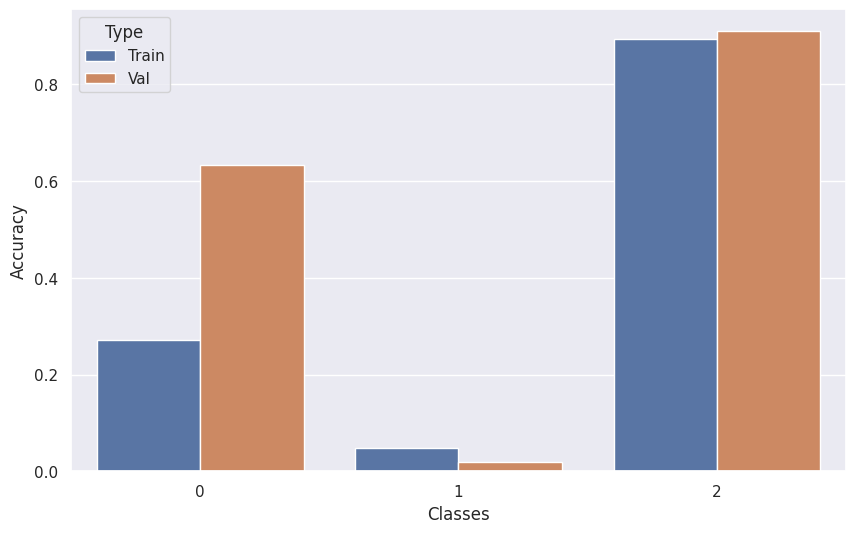

[1.0094164461185484, 0.5252577319587628, 0.5252577319587628] 
 [0.9702479412867909, 0.6190476190476191, 0.6190476190476191]


In [32]:
count_plot_print(metrics)

In [ ]:
pop_size = 50 
nlayers = 3
max_nfilters = 100
max_sfilters = 10 # 20
epochs = 10
num_generations = 10

genCNN = Genetic(pop_size,nlayers,max_nfilters,max_sfilters)
pop = genCNN.generate_population()

for i in tqdm(range(num_generations+1)):
    pop_acc = genCNN.fitness(pop,train_dl,epochs)
    print('Best Accuracy at the generation {}: {}'.format(i,genCNN.max_acc))
    parents = genCNN.select_parents(pop,5,pop_acc.copy())
    child = genCNN.crossover(parents)
    child = genCNN.mutation(child)
    pop = np.concatenate((parents,child),axis=0).astype('int')

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Best Accuracy at the generation 0: 0.4941860465116279


  0%|          | 0/50 [00:00<?, ?it/s]

Best Accuracy at the generation 1: 0.4941860465116279


  0%|          | 0/50 [00:00<?, ?it/s]

Best Accuracy at the generation 2: 0.4941860465116279


  0%|          | 0/50 [00:00<?, ?it/s]

Best Accuracy at the generation 3: 0.4941860465116279


  0%|          | 0/50 [00:00<?, ?it/s]

Best Accuracy at the generation 4: 0.4941860465116279


  0%|          | 0/50 [00:00<?, ?it/s]

Best Accuracy at the generation 5: 0.4941860465116279


  0%|          | 0/50 [00:00<?, ?it/s]

Best Accuracy at the generation 6: 0.4941860465116279


  0%|          | 0/50 [00:00<?, ?it/s]

Best Accuracy at the generation 7: 0.4941860465116279


  0%|          | 0/50 [00:00<?, ?it/s]

Best Accuracy at the generation 8: 0.4941860465116279


  0%|          | 0/50 [00:00<?, ?it/s]

Best Accuracy at the generation 9: 0.4941860465116279


  0%|          | 0/50 [00:00<?, ?it/s]

Best Accuracy at the generation 10: 0.4941860465116279


In [ ]:
genCNN.best_arch

array([ 6, 39, 18,  5,  7,  6])

In [20]:
nfilters = [ 6, 39, 18]
sfilters = [ 5,  7,  6]


metrics = []

len_dataset = len(dataset)

for i in range(1, N_groups + 1):
    
    model = CNN(nfilters,sfilters).to(device)
    loss_fn = nn.CrossEntropyLoss()
    f1 = F1Score(task="multiclass", num_classes=3, average='micro').to(device)
    optimizer = Adam(model.parameters(), lr=0.001, weight_decay=0.001)

    train_, val_ = leave_n_out(dataset, i, SIZES)
    best_metr = train(20, device, train_, val_, f'loocv_{i}_group', True ,'GA_Fleb_project')
    metrics.append(best_metr)

wandb: Currently logged in as: anastasiarudenko. Use `wandb login --relogin` to force relogin


  0%|          | 0/20 [00:00<?, ?it/s]

train F1,▁▃▃▃▅▅▅▆▆▆▅▆▇▇▇▇▇▇▇█
train accuracy,▁▃▃▃▅▅▅▆▆▆▅▆▇▇▇▇▇▇▇█
train loss,█▆▅▅▄▄▄▄▃▃▃▃▃▂▂▁▁▁▂▁
val F1,▃▃▃▃▆▃█▁▁▃▁▃▁▃▆▃▁▆▁▆
val accuracy,▃▃▃▃▆▃█▁▁▃▁▃▁▃▆▃▁▆▁▆
val loss,▁▂▄▂▂▂▂▃▄▄▅▅▃▅▆▇██▆▇
train F1,0.59278
train accuracy,0.59278
train loss,0.90408
val F1,0.52381
val accuracy,0.52381


  0%|          | 0/20 [00:00<?, ?it/s]

train F1,▁▄▄▄▄▄▇▇▆▇▇▆█▇▇▇▇▆▇▆
train accuracy,▁▄▄▄▄▄▇▇▆▇▇▆█▇▇▇▇▆▇▆
train loss,█▆▆▇▅▅▄▃▂▂▂▂▂▁▂▁▂▂▁▁
val F1,▁▁▁▁▆▁▃▅▅▆▆▆▃▆█▆▆█▆▆
val accuracy,▁▁▁▁▆▁▃▅▅▆▆▆▃▆█▆▆█▆▆
val loss,▇▇█▆▅▇▄▃▃▁▃▃▆▁▂▂▂▂▂▃
train F1,0.53093
train accuracy,0.53093
train loss,0.93915
val F1,0.61905
val accuracy,0.61905


  0%|          | 0/20 [00:00<?, ?it/s]

train F1,▁▆▆█▆▇▆▄▇██▆▇▇▆▇▇██▇
train accuracy,▁▆▆█▆▇▆▄▇██▆▇▇▆▇▇██▇
train loss,█▆▅▃▄▃▃▅▁▂▂▂▂▂▂▂▁▁▁▁
val F1,▆▆█▆▁▃▃█▃▃▃▆▃▆▃▃▃▃▃▃
val accuracy,▆▆█▆▁▃▃█▃▃▃▆▃▆▃▃▃▃▃▃
val loss,▂▅▁▂▇▅▅▂█▅▅▄▅▄▄█▆▆▅▆
train F1,0.55155
train accuracy,0.55155
train loss,0.92692
val F1,0.42857
val accuracy,0.42857


  0%|          | 0/20 [00:00<?, ?it/s]

train F1,▁▅▄▆▆▇▇▇▇▇▇▇▇▇█▇▇▆██
train accuracy,▁▅▄▆▆▇▇▇▇▇▇▇▇▇█▇▇▆██
train loss,█▆▄▄▃▂▄▄▁▂▂▁▂▂▁▂▂▂▂▁
val F1,▄▄▁▄▁▄▁█▄█▁▁██▁▁▄▁█▄
val accuracy,▄▄▁▄▁▄▁█▄█▁▁██▁▁▄▁█▄
val loss,▆▃▇▂▆▇▃▃█▂▃▇▃▂▂▇▃▄▁▄
train F1,0.56701
train accuracy,0.56701
train loss,0.93613
val F1,0.47619
val accuracy,0.47619


  0%|          | 0/20 [00:00<?, ?it/s]

train F1,▁▄▄▅▆▅▄▇▇▅▇█▆▇█▇█▆▆▆
train accuracy,▁▄▄▅▆▅▄▇▇▅▇█▆▇█▇█▆▆▆
train loss,█▇▆▄▄▃▃▄▂▂▂▁▂▂▁▂▁▂▂▁
val F1,▁▁▁▁▅▁▆█▆▅▆▅█▆▆▅██▆█
val accuracy,▁▁▁▁▅▁▆█▆▅▆▅█▆▆▅██▆█
val loss,▅▅▄▄▄█▃▂▃▃▂▃▂▁▂▂▁▁▁▁
train F1,0.52062
train accuracy,0.52062
train loss,0.94963
val F1,0.66667
val accuracy,0.66667


  0%|          | 0/20 [00:00<?, ?it/s]

train F1,▁▂▃▃▃▃▂▃▄▄▄▄▅▆▆▆▆▅█▆
train accuracy,▁▂▃▃▃▃▂▃▄▄▄▄▅▆▆▆▆▅█▆
train loss,█▇▆▆▆▆▆▅▄▄▄▃▂▂▁▁▂▁▁▁
val F1,▁▁▁▁▁▁▁▁▅▁▁████▅▅▅▅█
val accuracy,▁▁▁▁▁▁▁▁▅▁▁████▅▅▅▅█
val loss,▇▇▇▇█▇▆▄▅█▅▃▁▁▃▅▄▄▄▂
train F1,0.53608
train accuracy,0.53608
train loss,0.96434
val F1,0.57143
val accuracy,0.57143


  0%|          | 0/20 [00:00<?, ?it/s]

train F1,▁▄▄▄▄▄▄▄▄▅▇▆▇▆▅▇█▇▇▇
train accuracy,▁▄▄▄▄▄▄▄▄▅▇▆▇▆▅▇█▇▇▇
train loss,█▇▇▆▆▆▅▄▄▃▄▃▂▂▃▂▂▂▁▁
val F1,▄▄▄▄▄▄▄▄█▁▁▄▁▄▁▁▁▁▁▁
val accuracy,▄▄▄▄▄▄▄▄█▁▁▄▁▄▁▁▁▁▁▁
val loss,▄▃▃▃▂▃▂▁▁▆▁▂█▃▂▁▃▂▁▁
train F1,0.56186
train accuracy,0.56186
train loss,0.94746
val F1,0.42857
val accuracy,0.42857


  0%|          | 0/20 [00:00<?, ?it/s]

train F1,▂▂▂▂▁▅▆█▆▅▅▆▆▇██▆▄▇▇
train accuracy,▂▂▂▂▁▅▆█▆▅▅▆▆▇██▆▄▇▇
train loss,█▇▆▆▅▄▃▂▂▃▃▂▁▂▁▁▂▂▁▁
val F1,▁▁▁▁▁▅▆▅▅▅▆███▅▅▅▅▅▅
val accuracy,▁▁▁▁▁▅▆▅▅▅▆███▅▅▅▅▅▅
val loss,▆▇█▅▆▃▂▄▄▁▃▁▁▁▃▂▃▂▃▃
train F1,0.54639
train accuracy,0.54639
train loss,0.95132
val F1,0.57143
val accuracy,0.57143


  0%|          | 0/20 [00:00<?, ?it/s]

train F1,▁▆▅▆▇▇▅█▇█▇▇█▆▇▇▇▇█▇
train accuracy,▁▆▅▆▇▇▅█▇█▇▇█▆▇▇▇▇█▇
train loss,█▆▆▅▄▃▄▃▂▂▂▃▂▂▁▁▂▂▁▁
val F1,▁▁█▁▃▁▆▃▃▃▃▃▃▃▃▁▃▃▅▃
val accuracy,▁▁█▁▃▁▆▃▃▃▃▃▃▃▃▁▃▃▅▃
val loss,█▇▇▅▅▇▄▃▁▃▃▂▄▂▂▆▃▃▂▂
train F1,0.55155
train accuracy,0.55155
train loss,0.96928
val F1,0.52381
val accuracy,0.52381


  0%|          | 0/20 [00:00<?, ?it/s]

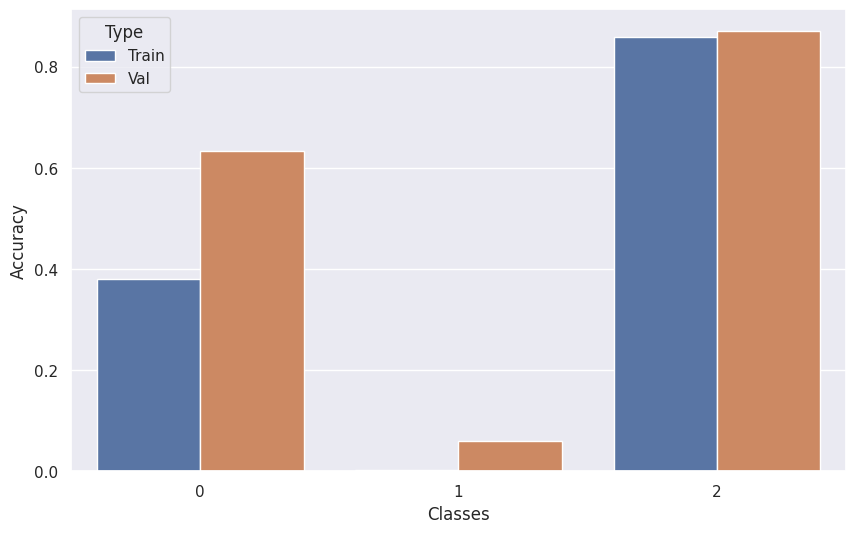

[0.9921311714600043, 0.5262886597938145, 0.5262886597938145] 
 [0.9708827856750715, 0.6095238095238096, 0.6095238095238096]


In [21]:
count_plot_print(metrics)

Small population size

In [ ]:
pop_size = 10 
nlayers = 3
max_nfilters = 100
max_sfilters = 10 # 20
epochs = 20
num_generations = 10

genCNN = Genetic(pop_size,nlayers,max_nfilters,max_sfilters)
pop = genCNN.generate_population()

for i in tqdm(range(num_generations+1)):
    pop_acc = genCNN.fitness(pop,train_dl,epochs)
    print('Best Accuracy at the generation {}: {}'.format(i,genCNN.max_acc))
    parents = genCNN.select_parents(pop,5,pop_acc.copy())
    child = genCNN.crossover(parents)
    child = genCNN.mutation(child)
    pop = np.concatenate((parents,child),axis=0).astype('int')

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Best Accuracy at the generation 0: 0.48255813953488375


  0%|          | 0/10 [00:00<?, ?it/s]

Best Accuracy at the generation 1: 0.48255813953488375


  0%|          | 0/10 [00:00<?, ?it/s]

Best Accuracy at the generation 2: 0.4883720930232558


  0%|          | 0/10 [00:00<?, ?it/s]

Best Accuracy at the generation 3: 0.4883720930232558


  0%|          | 0/10 [00:00<?, ?it/s]

Best Accuracy at the generation 4: 0.4883720930232558


  0%|          | 0/10 [00:00<?, ?it/s]

Best Accuracy at the generation 5: 0.4883720930232558


  0%|          | 0/10 [00:00<?, ?it/s]

Best Accuracy at the generation 6: 0.4883720930232558


  0%|          | 0/10 [00:00<?, ?it/s]

Best Accuracy at the generation 7: 0.4883720930232558


  0%|          | 0/10 [00:00<?, ?it/s]

Best Accuracy at the generation 8: 0.4883720930232558


  0%|          | 0/10 [00:00<?, ?it/s]

Best Accuracy at the generation 9: 0.4883720930232558


  0%|          | 0/10 [00:00<?, ?it/s]

Best Accuracy at the generation 10: 0.4883720930232558


In [ ]:
genCNN.best_arch

array([74, 40, 82,  4,  1,  9])

In [22]:
nfilters = [ 74, 40, 82]
sfilters = [ 4,  1,  9]


metrics = []

len_dataset = len(dataset)

for i in range(1, N_groups + 1):
    
    model = CNN(nfilters,sfilters).to(device)
    loss_fn = nn.CrossEntropyLoss()
    f1 = F1Score(task="multiclass", num_classes=3, average='micro').to(device)
    optimizer = Adam(model.parameters(), lr=0.001, weight_decay=0.001)

    train_, val_ = leave_n_out(dataset, i, SIZES)
    best_metr = train(20, device, train_, val_, f'loocv_{i}_group_small', True ,'GA_Fleb_project')
    metrics.append(best_metr)

train F1,▂▂▂▂▄▁▃▅▄▇█▅▅▆▃▇▆▆▅▆
train accuracy,▂▂▂▂▄▁▃▅▄▇█▅▅▆▃▇▆▆▅▆
train loss,█▆▆▅▄▄▄▃▃▂▂▃▁▁▂▂▁▁▁▁
val F1,▁▁▁▁▁▁▅▁███▇▅▂█▂▂██▄
val accuracy,▁▁▁▁▁▁▅▁███▇▅▂█▂▂██▄
val loss,▇▇▆▆█▅▄▄▃▂▂▃▁▂▃▁▂▂▁▁
train F1,0.53093
train accuracy,0.53093
train loss,0.96661
val F1,0.57143
val accuracy,0.57143


  0%|          | 0/20 [00:00<?, ?it/s]

train F1,▁▅▅▇▇▄▆▇▆▆▇▇▆█▇▇▇▇█▆
train accuracy,▁▅▅▇▇▄▆▇▆▆▇▇▆█▇▇▇▇█▆
train loss,█▆▆▃▂▄▃▂▂▂▂▂▂▂▁▁▂▁▂▁
val F1,▅▅▅▁▁▁█▇▁▅▂▄▄▄▂▄▂▅▇▂
val accuracy,▅▅▅▁▁▁█▇▁▅▂▄▄▄▂▄▂▅▇▂
val loss,▁▁▁▇▆▆▃▄█▇▇▆▅▅▆▆▆▇▄▇
train F1,0.54639
train accuracy,0.54639
train loss,0.91366
val F1,0.38095
val accuracy,0.38095


  0%|          | 0/20 [00:00<?, ?it/s]

train F1,▁▃▆▆▅▆▆█▆▆▆█▇▇▅▆▇▇█▆
train accuracy,▁▃▆▆▅▆▆█▆▆▆█▇▇▅▆▇▇█▆
train loss,█▆▅▃▃▃▃▃▂▂▁▁▁▁▂▁▁▁▁▁
val F1,▁▁▃▆▅▆▅▃█▃▅▃▆▆▆▆▅▆▆▆
val accuracy,▁▁▃▆▅▆▅▃█▃▅▃▆▆▆▆▅▆▆▆
val loss,▇▆▄▂▂▂▄▅▂▇▁█▁▁▂▁▂▂▁▂
train F1,0.54124
train accuracy,0.54124
train loss,0.94248
val F1,0.61905
val accuracy,0.61905


  0%|          | 0/20 [00:00<?, ?it/s]

train F1,▁▂▄▅▅▅▅██▆▇▇▆▇▇█▇▇▇█
train accuracy,▁▂▄▅▅▅▅██▆▇▇▆▇▇█▇▇▇█
train loss,█▆▅▄▄▂▂▂▂▂▂▂▁▂▁▁▂▁▁▁
val F1,▆▆▆▆▃█▆▆█▃▁▃▁▆▆▃▆▃▁▁
val accuracy,▆▆▆▆▃█▆▆█▃▁▃▁▆▆▃▆▃▁▁
val loss,▁▁▆▂▅▂▄▅▃▅█▅▇▆▅█▆▇▆▆
train F1,0.58247
train accuracy,0.58247
train loss,0.92113
val F1,0.38095
val accuracy,0.38095


  0%|          | 0/20 [00:00<?, ?it/s]

train F1,▁▂▄▇▅▆▇▇▆▅▆▇█▆▆▆▇▄▇▇
train accuracy,▁▂▄▇▅▆▇▇▆▅▆▇█▆▆▆▇▄▇▇
train loss,█▇▆▅▄▂▃▁▃▂▂▂▁▂▁▁▁▁▁▁
val F1,▄▄█▁▄▄▄█▄██▄█▄█▄▄▄▄█
val accuracy,▄▄█▁▄▄▄█▄██▄█▄█▄▄▄▄█
val loss,▅▇▃█▆▂▂▃▆▂▃▄▅▅▁▃▃▇▁▂
train F1,0.56186
train accuracy,0.56186
train loss,0.93522
val F1,0.52381
val accuracy,0.52381


  0%|          | 0/20 [00:00<?, ?it/s]

train F1,▁▂▁▄▇▅▆▆▇▄▆▇▅▇▆▆█▆▆▇
train accuracy,▁▂▁▄▇▅▆▆▇▄▆▇▅▇▆▆█▆▆▇
train loss,█▇▆▄▃▃▂▂▂▃▁▁▃▂▂▂▁▁▃▁
val F1,▁▁▂▅▄▂▅▂▇▅▇▄▅▅█▅▇▇▅▅
val accuracy,▁▁▂▅▄▂▅▂▇▅▇▄▅▅█▅▇▇▅▅
val loss,██▆▄▄▃▂▄▂▂▁▃▂▂▃▂▁▂▃▁
train F1,0.5567
train accuracy,0.5567
train loss,0.94711
val F1,0.61905
val accuracy,0.61905


  0%|          | 0/20 [00:00<?, ?it/s]

train F1,▁▃▅▆▅▇▅▆▅▅▇▄▄▄▅▆▅█▇█
train accuracy,▁▃▅▆▅▇▅▆▅▅▇▄▄▄▅▆▅█▇█
train loss,█▇▆▄▃▂▃▂▂▃▂▃▂▂▂▁▁▁▂▁
val F1,▃▃▆▃▆▆▆▆▆▆▆▁▆█▆▆▆▆▆█
val accuracy,▃▃▆▃▆▆▆▆▆▆▆▁▆█▆▆▆▆▆█
val loss,█▇▄█▁▄▃▂▅▃▁▆▂▂▁▆▇▃▂▅
train F1,0.59278
train accuracy,0.59278
train loss,0.92898
val F1,0.57143
val accuracy,0.57143


  0%|          | 0/20 [00:00<?, ?it/s]

train F1,▁▂▃▆▆▇█▇▇▆▇▇▇▇▇▇▇▆▇▇
train accuracy,▁▂▃▆▆▇█▇▇▆▇▇▇▇▇▇▇▆▇▇
train loss,█▇▆▃▁▂▂▂▃▂▁▂▂▁▁▁▂▂▂▁
val F1,▄▄▃▆▆█▃▃▆▃▄▃▃█▁▃█▆▁▃
val accuracy,▄▄▃▆▆█▃▃▆▃▄▃▃█▁▃█▆▁▃
val loss,▄▃▃▄▆▃▃▂▃▄█▄▆▄▃▁▄▁▁▂
train F1,0.56701
train accuracy,0.56701
train loss,0.92847
val F1,0.42857
val accuracy,0.42857


  0%|          | 0/20 [00:00<?, ?it/s]

train F1,▁▂▂▂▃▅▄▆▅▆▆▄▆▇▆▇▅██▇
train accuracy,▁▂▂▂▃▅▄▆▅▆▆▄▆▇▆▇▅██▇
train loss,█▇▆▆▄▃▃▃▃▂▃▂▂▁▂▂▁▁▁▁
val F1,▁▁▁▁█▆▆▆▅█▅▆▆█▅▆█▆█▆
val accuracy,▁▁▁▁█▆▆▆▅█▅▆▆█▅▆█▆█▆
val loss,██▇▆▅▅▄▁▄▁▄▁▃▂▃▁▁▁▁▄
train F1,0.57732
train accuracy,0.57732
train loss,0.93012
val F1,0.61905
val accuracy,0.61905


  0%|          | 0/20 [00:00<?, ?it/s]

train F1,▁▁▁▁▅▆▇▅▇▅▅▅▇▅██▅█▇▆
train accuracy,▁▁▁▁▅▆▇▅▇▅▅▅▇▅██▅█▇▆
train loss,█▇▇▆▅▅▄▂▃▂▃▃▂▂▂▁▃▁▂▂
val F1,▁▁▁▁█▅▂▁▂▂▂▄▄▂▂▂▂▂▂▂
val accuracy,▁▁▁▁█▅▂▁▂▂▂▄▄▂▂▂▂▂▂▂
val loss,██▇▆▇▄▄▅▁▃▁▁▂▄▂▃▃▂▂▄
train F1,0.54639
train accuracy,0.54639
train loss,0.95673
val F1,0.52381
val accuracy,0.52381


  0%|          | 0/20 [00:00<?, ?it/s]

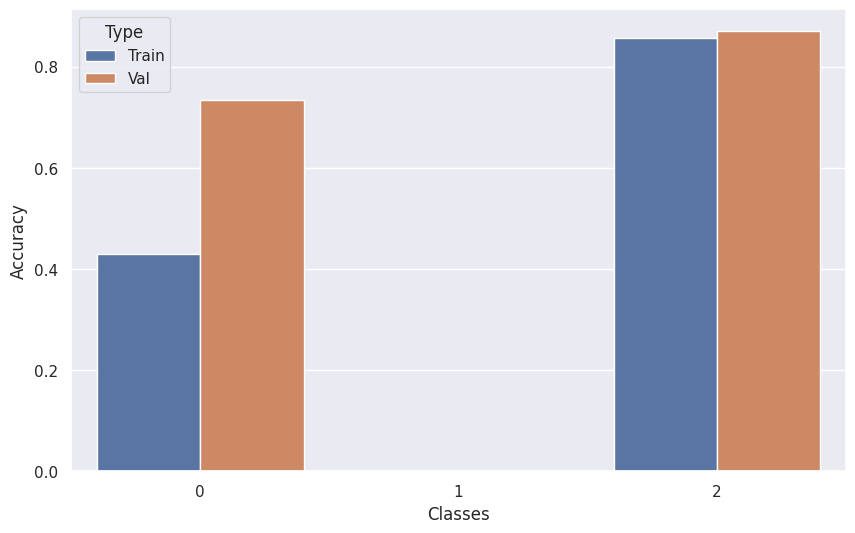

[0.9687538401674978, 0.5391752577319587, 0.5391752577319587] 
 [0.9837034514262564, 0.6238095238095238, 0.6238095238095238]


In [23]:
count_plot_print(metrics)